In [354]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [355]:
data = pd.read_csv("performance.csv")
df=pd.DataFrame(data)

In [356]:
print(df)

   percentage educational_resources parents_education  personality passion  \
0          85                medium          graduate  extroverted     yes   
1          78          satisfactory     undergraduate   ambiverted      no   
2          92                  poor               PhD  introverted     yes   
3          87                medium          graduate  extroverted      no   
4          80          satisfactory     undergraduate   ambiverted     yes   
5          95                medium               PhD  introverted     yes   
6          88          satisfactory          graduate  extroverted      no   
7          75                  poor     undergraduate   ambiverted      no   
8          89                medium          graduate  extroverted     yes   
9          82          satisfactory     undergraduate  introverted     yes   

   ott_time  sm_time  travel_time  eduvids_time  game_time  extra_time  \
0       2.0      1.0          0.5           3.0        1.0         

In [357]:
null_values=df.isnull()
print(null_values)

   percentage  educational_resources  parents_education  personality  passion  \
0       False                  False              False        False    False   
1       False                  False              False        False    False   
2       False                  False              False        False    False   
3       False                  False              False        False    False   
4       False                  False              False        False    False   
5       False                  False              False        False    False   
6       False                  False              False        False    False   
7       False                  False              False        False    False   
8       False                  False              False        False    False   
9       False                  False              False        False    False   

   ott_time  sm_time  travel_time  eduvids_time  game_time  extra_time  \
0     False    False        False 

In [358]:
total_null_values=df.isnull().sum()
print(total_null_values)

percentage               0
educational_resources    0
parents_education        0
personality              0
passion                  0
ott_time                 0
sm_time                  0
travel_time              0
eduvids_time             0
game_time                0
extra_time               0
ai_usage                 0
dtype: int64


In [359]:
# Map educational_resources values to numerical representations
# convert categorical variable to numerical
df['passion'] = df['passion'].apply(lambda x: 1 if x =='yes' else 0)
print(df)

   percentage educational_resources parents_education  personality  passion  \
0          85                medium          graduate  extroverted        1   
1          78          satisfactory     undergraduate   ambiverted        0   
2          92                  poor               PhD  introverted        1   
3          87                medium          graduate  extroverted        0   
4          80          satisfactory     undergraduate   ambiverted        1   
5          95                medium               PhD  introverted        1   
6          88          satisfactory          graduate  extroverted        0   
7          75                  poor     undergraduate   ambiverted        0   
8          89                medium          graduate  extroverted        1   
9          82          satisfactory     undergraduate  introverted        1   

   ott_time  sm_time  travel_time  eduvids_time  game_time  extra_time  \
0       2.0      1.0          0.5           3.0        1

In [360]:
mapping_dict1 = {'good': 1, 'poor': 0, 'satisfactory': 0.5}

# Apply the mapping to the DataFrame column
df['educational_resources'] = df['educational_resources'].map(mapping_dict1)


In [361]:
mapping_dict2 = {'extroverted': 0, 'introverted': 1, 'ambiverted': 0.5}

# Apply the mapping to the DataFrame column
df['personality'] = df['personality'].map(mapping_dict2)

In [362]:
mapping_dict3 = {'regular': 0, 'never': 1, 'occasional': 0.5}

# Apply the mapping to the DataFrame column
df['ai_usage'] = df['ai_usage'].map(mapping_dict3)

In [363]:
mapping_dict4 = {'below10': 0.20, '10': 0.22, '12': 0.25, 'undergraduate': 0.5, 'graduate': 0.65, 'PhD': 0.75, }

# Apply the mapping to the DataFrame column
df['parents_education'] = df['parents_education'].map(mapping_dict4)

In [364]:
df['study_time'] = 9-df['ott_time']-df['sm_time']-df['travel_time']+df['eduvids_time']-df['game_time']-df['extra_time']

In [365]:
# Print the modified DataFrame
print(df)

   percentage  educational_resources  parents_education  personality  passion  \
0          85                    NaN               0.65          0.0        1   
1          78                    0.5               0.50          0.5        0   
2          92                    0.0               0.75          1.0        1   
3          87                    NaN               0.65          0.0        0   
4          80                    0.5               0.50          0.5        1   
5          95                    NaN               0.75          1.0        1   
6          88                    0.5               0.65          0.0        0   
7          75                    0.0               0.50          0.5        0   
8          89                    NaN               0.65          0.0        1   
9          82                    0.5               0.50          1.0        1   

   ott_time  sm_time  travel_time  eduvids_time  game_time  extra_time  \
0       2.0      1.0          0.5 

array([[<Axes: title={'center': 'percentage'}>,
        <Axes: title={'center': 'educational_resources'}>],
       [<Axes: title={'center': 'parents_education'}>,
        <Axes: title={'center': 'passion'}>],
       [<Axes: title={'center': 'ai_usage'}>,
        <Axes: title={'center': 'study_time'}>]], dtype=object)

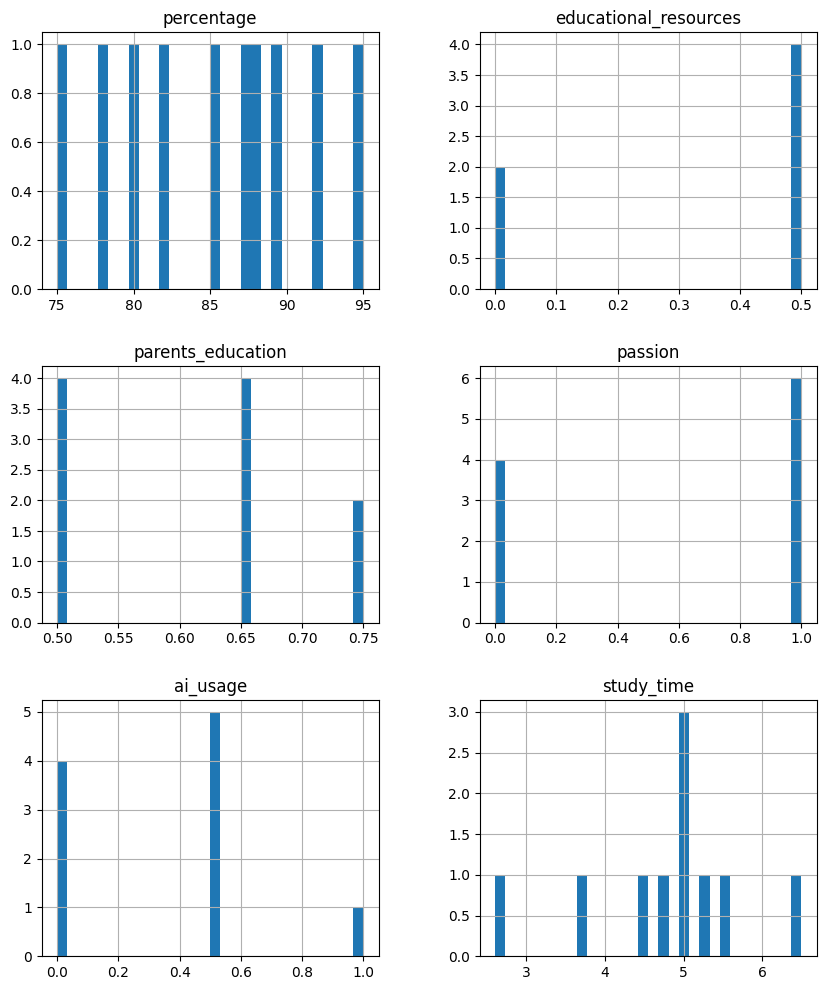

In [366]:
import matplotlib.pyplot as plt
df[  ['percentage', 'educational_resources', 'parents_education', 'passion', 'ai_usage', 'study_time']].hist(bins=30, figsize=(10,12))

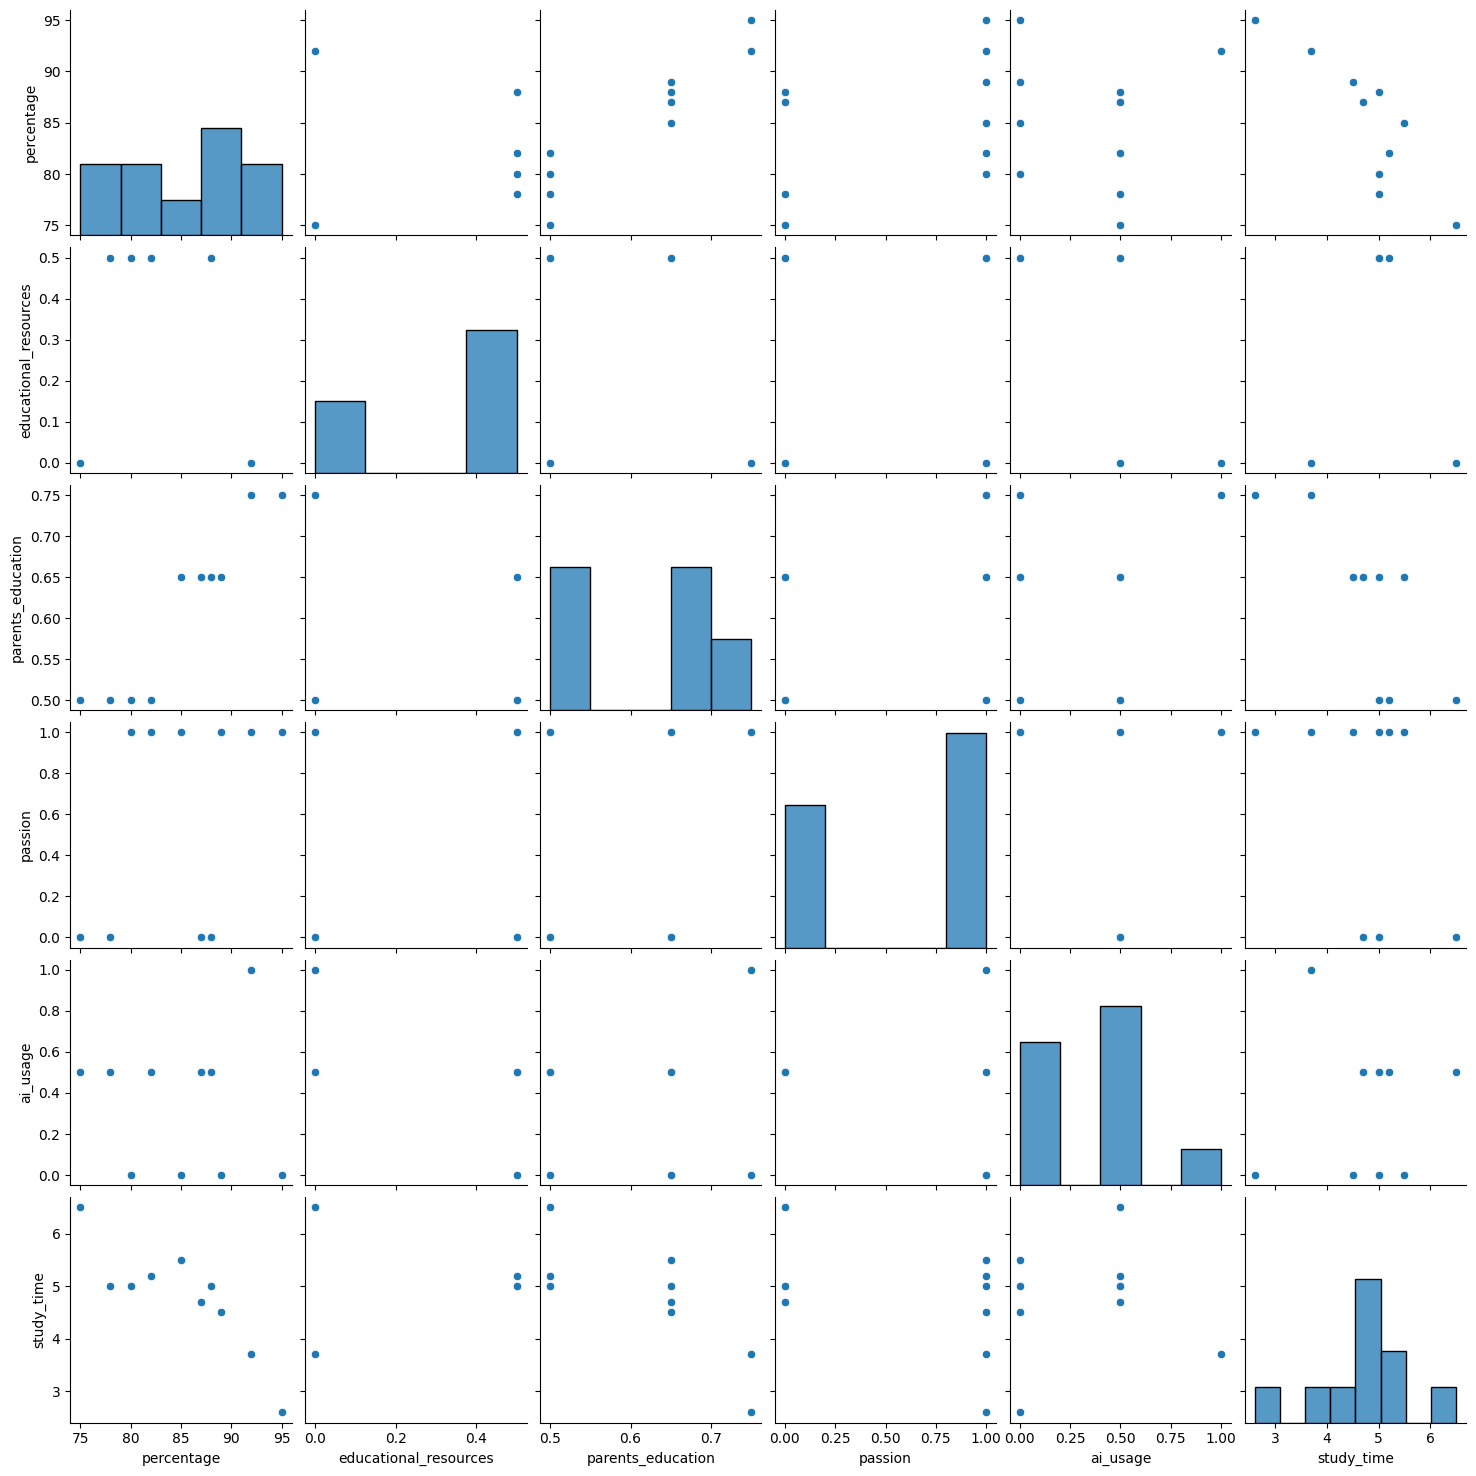

In [367]:
import seaborn as sns
# plot pairplot
sns.pairplot(df[  ['percentage', 'educational_resources', 'parents_education', 'passion', 'ai_usage', 'study_time']])

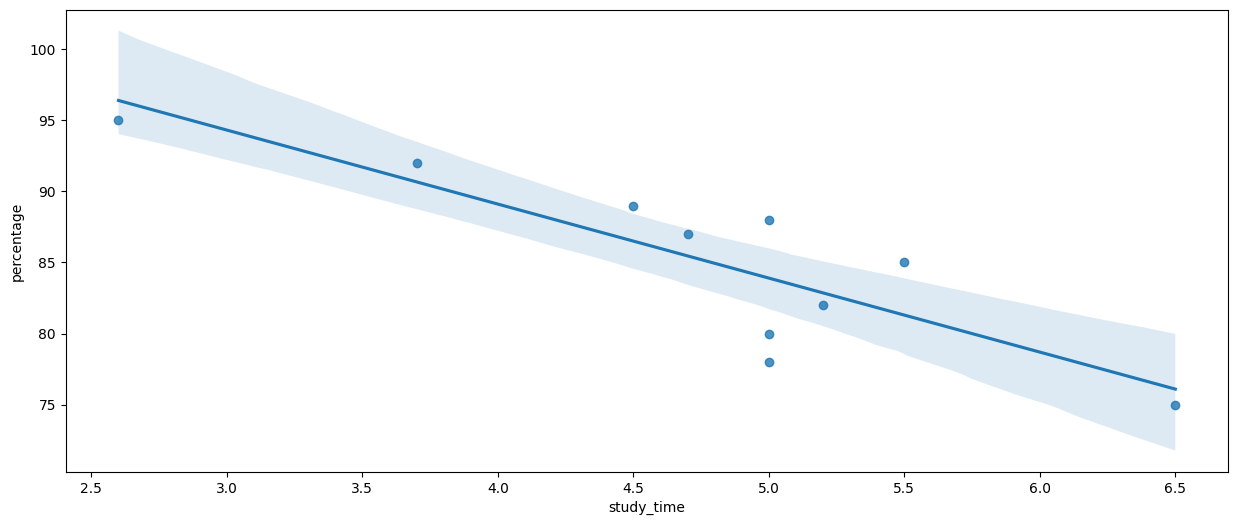

In [368]:
#regplot=regression plotting
plt.figure(figsize = (15, 6))
sns.regplot(x = 'study_time', y = 'percentage', data = df)
plt.show()

In [369]:
df.corr()

,percentage,educational_resources,parents_education,personality,passion,ott_time,sm_time,travel_time,eduvids_time,game_time,extra_time,ai_usage,study_time
percentage,1.000000,-1.214167e-01,0.942573,0.102200,4.213302e-01,0.824089,-0.932850,-0.536448,-0.418187,-0.795233,0.922574,-0.044194,-0.858692
educational_resources,-0.121417,1.000000e+00,-0.418330,-0.342997,3.925231e-17,-0.220863,0.028677,0.509565,-0.316228,0.612372,-0.368605,-0.612372,-0.029037
parents_education,0.942573,-4.183300e-01,1.000000,0.012417,2.947532e-01,0.716810,-0.839742,-0.510134,-0.179178,-0.768936,0.918541,0.048324,-0.746999
personality,0.102200,-3.429972e-01,0.012417,1.000000,3.931785e-01,0.338420,-0.148411,-0.515086,-0.675664,-0.439587,0.275513,0.319619,-0.417094
passion,0.421330,3.925231e-17,0.294753,0.393179,1.000000e+00,0.701334,-0.639594,-0.849333,-0.490990,-0.559017,0.446844,-0.382546,-0.437114
ott_time,0.824089,-2.208631e-01,0.716810,0.338420,7.013344e-01,1.000000,-0.906498,-0.815337,-0.605218,-0.879160,0.831383,-0.268293,-0.861322
sm_time,-0.932850,2.867697e-02,-0.839742,-0.148411,-6.395943e-01,-0.906498,1.000000,0.663367,0.562860,0.765887,-0.858675,0.144398,0.852477
travel_time,-0.536448,5.095652e-01,-0.510134,-0.515086,-8.493328e-01,-0.815337,0.663367,1.000000,0.430128,0.836111,-0.675714,0.263605,0.580079
eduvids_time,-0.418187,-3.162278e-01,-0.179178,-0.675664,-4.909903e-01,-0.605218,0.562860,0.430128,1.000000,0.447288,-0.385606,-0.125218,0.680301
game_time,-0.795233,6.123724e-01,-0.768936,-0.439587,-5.590170e-01,-0.879160,0.765887,0.836111,0.447288,1.000000,-0.847784,0.095044,0.749968


<Axes: >

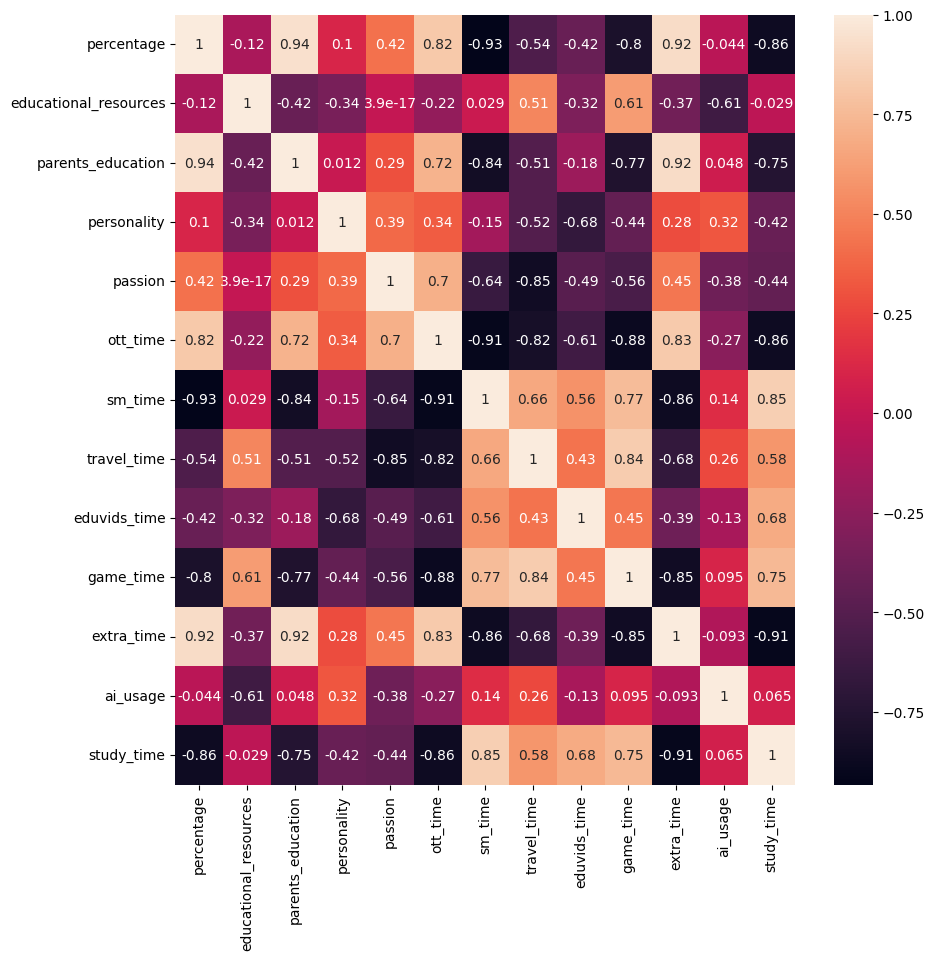

In [370]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [371]:
df.columns

Index(['percentage', 'educational_resources', 'parents_education',
       'personality', 'passion', 'ott_time', 'sm_time', 'travel_time',
       'eduvids_time', 'game_time', 'extra_time', 'ai_usage', 'study_time'],
      dtype='object')

In [372]:
X=df.drop(columns=['percentage'])
y=df['percentage']

In [373]:
print(X)

   educational_resources  parents_education  personality  passion  ott_time  \
0                    NaN               0.65          0.0        1       2.0   
1                    0.5               0.50          0.5        0       1.5   
2                    0.0               0.75          1.0        1       3.0   
3                    NaN               0.65          0.0        0       2.0   
4                    0.5               0.50          0.5        1       2.5   
5                    NaN               0.75          1.0        1       3.5   
6                    0.5               0.65          0.0        0       2.0   
7                    0.0               0.50          0.5        0       1.5   
8                    NaN               0.65          0.0        1       3.0   
9                    0.5               0.50          1.0        1       2.0   

   sm_time  travel_time  eduvids_time  game_time  extra_time  ai_usage  \
0      1.0          0.5           3.0        1.0        

In [374]:
print(y)

0    85
1    78
2    92
3    87
4    80
5    95
6    88
7    75
8    89
9    82
Name: percentage, dtype: int64


In [375]:
X.shape

(10, 12)

In [376]:
y.shape

(10,)

In [377]:
import numpy as np
#coverting in numpy array for ease to use
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [378]:
y = y.reshape(-1,1)

In [379]:
X

array([[ nan, 0.65, 0.  , 1.  , 2.  , 1.  , 0.5 , 3.  , 1.  , 2.  , 0.  ,
        5.5 ],
       [0.5 , 0.5 , 0.5 , 0.  , 1.5 , 1.5 , 1.  , 2.5 , 1.5 , 1.  , 0.5 ,
        5.  ],
       [0.  , 0.75, 1.  , 1.  , 3.  , 0.5 , 0.3 , 2.  , 0.5 , 3.  , 1.  ,
        3.7 ],
       [ nan, 0.65, 0.  , 0.  , 2.  , 1.  , 0.8 , 2.5 , 1.  , 2.  , 0.5 ,
        4.7 ],
       [0.5 , 0.5 , 0.5 , 1.  , 2.5 , 1.  , 0.5 , 2.  , 1.  , 1.  , 0.  ,
        5.  ],
       [ nan, 0.75, 1.  , 1.  , 3.5 , 0.5 , 0.2 , 2.  , 0.2 , 4.  , 0.  ,
        2.6 ],
       [0.5 , 0.65, 0.  , 0.  , 2.  , 1.  , 1.  , 2.5 , 1.  , 1.5 , 0.5 ,
        5.  ],
       [0.  , 0.5 , 0.5 , 0.  , 1.5 , 1.8 , 0.7 , 3.  , 1.  , 0.5 , 0.5 ,
        6.5 ],
       [ nan, 0.65, 0.  , 1.  , 3.  , 0.7 , 0.5 , 2.5 , 0.8 , 2.  , 0.  ,
        4.5 ],
       [0.5 , 0.5 , 1.  , 1.  , 2.  , 1.2 , 0.6 , 2.  , 1.  , 1.  , 0.5 ,
        5.2 ]], dtype=float32)

In [380]:
y.shape

(10, 1)

In [381]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)

print(X_train.shape)
print(X_test.shape)

(8, 12)
(2, 12)


In [382]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn = LinearRegression()
regression_model_sklearn.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
#check accuracy
regresssion_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

-20.05423567030165

In [ ]:
#prediction value
y_predict = regression_model_sklearn.predict(X_test)

In [ ]:
k = X_test.shape[1]
n = len(X_test)
n

2

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
#root mean square, mean square error, mean absolute error, coefficient of determination - r square

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 6.883 
MSE = 47.372032 
MAE = 5.7718697 
R2 = -20.05423567030165 
Adjusted R2 = 2.9140214245728773
